## Machine Learning: An Example of Complete Classification

In this guided notebook we are going to compare a bit algorithms for classification and show everything you'll need.

#### 1.0 — Import | Initial Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2.0 — DATA IMPORT
In this part, we import the data we are going to use.

In [2]:
data = pd.DataFrame(pd.read_excel('datasets/classification.xlsx'))

#### 3.0 — DATA STATISTICS
In this part, to get to know the dataframe, we have shared some mathematical statistics for the data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           10000 non-null  int64  
 1   Surname      10000 non-null  object 
 2   Score        10000 non-null  int64  
 3   Nationality  10000 non-null  object 
 4   Gender       10000 non-null  object 
 5   Age          10000 non-null  int64  
 6   Tenure       10000 non-null  int64  
 7   Balance      10000 non-null  float64
 8   Products     10000 non-null  int64  
 9   Card         10000 non-null  int64  
 10  Active       10000 non-null  int64  
 11  Salary       10000 non-null  float64
 12  Exited       10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
data.describe()

,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


This attribute is simply determines how many vacant features in this provided columns.

In [5]:
data.isna().sum()

Id             0
Surname        0
Score          0
Nationality    0
Gender         0
Age            0
Tenure         0
Balance        0
Products       0
Card           0
Active         0
Salary         0
Exited         0
dtype: int64

#### 4.0 — FEATURE FILTRATION / LABEL ENCODING
In this part, we are removing the string columns / nan value columns from our dataset, the reason behind is:

* String columns / NaN value columns cannot be used for M.L. & D.L. applications because they are string, if they will be useful for further steps we are going to use them by converting them to the numerical features (encoding section).

In [6]:
data = data.drop(axis=1, columns=['Id']) # id columns is useless, can't define anything.
data = data.drop(axis=1, columns=['Surname']) # surname columns is useless, can't define anything.

# this is our y, varibale we'll store it first, drop it later. then we are going to use it.
Y = data['Exited'].values
data = data.drop(axis=1, columns=['Exited'])
# We are going to encode 'nationality' and 'gender' columns to the numerical features.

# for gender column becuase its binary feature, it is called dummy encoding.
temp = pd.get_dummies(data['Gender'])
data = pd.concat([data, temp], axis=1).reindex(data.index)
data.drop('Gender', axis=1, inplace=True)

# for nationality column, we'll do label encoding.
from sklearn.preprocessing import LabelEncoder
ENCODER = LabelEncoder()

label = ENCODER.fit_transform(data['Nationality'])
data['Nationality'] = label

#### 4.1 — FEATURE FILTRATION / SLICING
In this part, if have to, we can filter the dataframe by its columns. (but for this application, we don't need to do it.)

In [7]:
slicingmode= 'off'
if slicingmode == 'full':
    data = data.loc[:, 599.753:3800.044]
elif slicingmode  == 'double':
    df1 = data.loc[:, 2600.538:3000.695]
    df2 = data.loc[:, 800.314:1200.471]
    data = pd.concat([df2,df1], axis = 1)
elif slicingmode  == 'low':
    data = data.loc[:, 800.314:1200.471]
elif slicingmode  == 'high':
    data = data.loc[:, 2600.538:3000.695]
elif slicingmode == 'off':
    pass

# variable definings.
total_columns = len(list(data.columns))
total_rows = len(list(data.index))

#### 5.0 — FEATURE ENGINEERING / SMOOTHING
In this section we have choosen to apply data smoothing which is a statistical approach of eliminating outliers from datasets to make the patterns more noticeable.

In [8]:
# this option set to inactive due to uncertainty of the exact coordination points.
smoothing_on_off = 'off'
if smoothing_on_off == 'on':
    from scipy.signal import savgol_filter
    smoothing = savgol_filter(data, window_length=15, polyorder=3) # or 17/6
    data = pd.DataFrame(smoothing)
elif smoothing_on_off == 'off':
    pass

#### 5.1 — FEATURE ENGINEERING / NORMALIZATION
In this section we are going to normalize our date to make it optimal for machine learning processes and also, we have several options and all-of them can be controlled by if/else key varibale.

In [9]:
# converting our data to numpy arrays.
data = data.values

feature_normalization = 'Vector Normalization'
if feature_normalization == 'Vector Normalization':
    from sklearn.preprocessing import StandardScaler
    SCALER = StandardScaler()
    data = SCALER.fit_transform(data)
elif feature_normalization == 'Min-Max Normalization':
    from sklearn.preprocessing import MinMaxScaler
    SCALER = MinMaxScaler()
    data = SCALER.fit_transform(data)
elif feature_normalization == 'Area Normalization':
        # this option set to inactive due to uneligiblity of the dataset for this process.
        area = []
        for i,j in zip(data.columns,area):
            scaled = []

            for q in list(data[i]):
                scaled.append(q/j)

            data[i] = scaled
elif feature_normalization == 'Raw Data':
    pass

# converting our data into the dataframes again.
data = pd.DataFrame(data)

#### 5.2 — FEATURE ENGINEERING / VARIANCE THRESHOLD
In this section, variance threshold selector that removes all low-variance features. It filtrates the columns in order to have low variance.

In [10]:
# this option set to inactive due to uneligiblity of the dataset for this process.
variance_threshold_operation = 'off'
if variance_threshold_operation == 'on':
    old_99 = len(list(data.columns))
    dv = data.values
    print(f'Standard deviation of the set is: {np.std(dv)}')
    print(f'Variance of the set is: {dv.var()}')
    from sklearn.feature_selection import VarianceThreshold
    FILTER = VarianceThreshold(threshold=1.0)
    XX = FILTER.fit_transform(dv)
    data = pd.DataFrame(XX)
    print(f'Opeartion finished | Total columns were: {old_99} | Current columns are: {len(list(data.columns))} | {(old_99)-(len(list(data.columns)))} columns has dropped.')

#### 6.0 — TRAIN & TEST SPLIT
In this section, we are going to determine our train & test values to apply our machine learning algorithms.

In [11]:
x = data.values
y = Y

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=17)

total_train_features, total_test_features = len(list(x_train)), len(list(x_test))
print(f'Total train features: {total_train_features} | total test features: {total_test_features}')

Total train features: 7000 | total test features: 3000


#### 7.0 — ADVANCED FEATURE ENGINEERING / PRINCIPAL COMPONENT ANALYSIS
In this section we have choosen to apply PCA algorithm, which stands as a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [12]:
# this option set to inactive due to uneligiblity of the dataset for this process.
pca_on_off = 'off'
if pca_on_off == 'on':
    from sklearn.decomposition import PCA
    pca = PCA(n_components=3)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)

#### 8.0 — Import | Machine Learning Models & Metrics

In [13]:
# Forecast Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Accuracy Alogirthms
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

#### EXTRA 1.0 — MANUAL MODEL OPTIMIZATION
We do this technique for comprehension between different hyperparameters for each machine learning model so we can find the better one.

##### EXTRA 1.1 — KNN OPTIMIZATION
In this section, we are going to determine the best n_neighbors value for each distance metrics.

In [14]:
knn_optimization_results = {}

def knn_optimization(metric):
    test_error_list, k_list = [], []

    if total_train_features <= 100:
        z = total_train_features
    else:
        z = 100

    for k in range(1,z):
        model0 = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        model0.fit(x_train,y_train) 
        y_pred = model0.predict(x_test)
        test_error = 1 - accuracy_score(y_test,y_pred)

        test_error_list.append(test_error)
        k_list.append(k)

    # removing the 0.0 loss value so we can eliminate the memorized classification.
    while True:
        if min(test_error_list) == 0.0:
            test_error_list.remove(min(test_error_list))
            k_list.remove(k_list[test_error_list.index(min(test_error_list))])
        else:
            break

    knn_optimization_results[metric] = [k_list[test_error_list.index(min(test_error_list))],min(test_error_list)]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'{metric} | The best n coefficient is: {k_list[test_error_list.index(min(test_error_list))]} | Minimum Loss: {min(test_error_list)}')
    plt.plot(k_list, test_error_list, label='Test Error',c = 'red',linestyle='dashdot')
    plt.ylabel('error rate')
    plt.xlabel("n_neighbors")

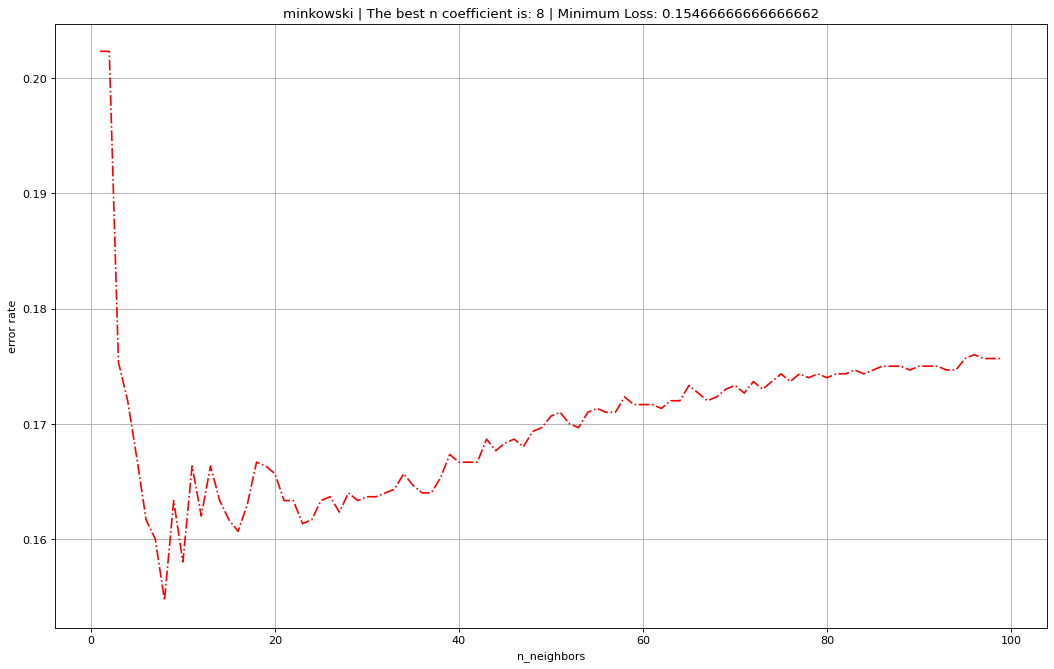

In [15]:
knn_optimization('minkowski')

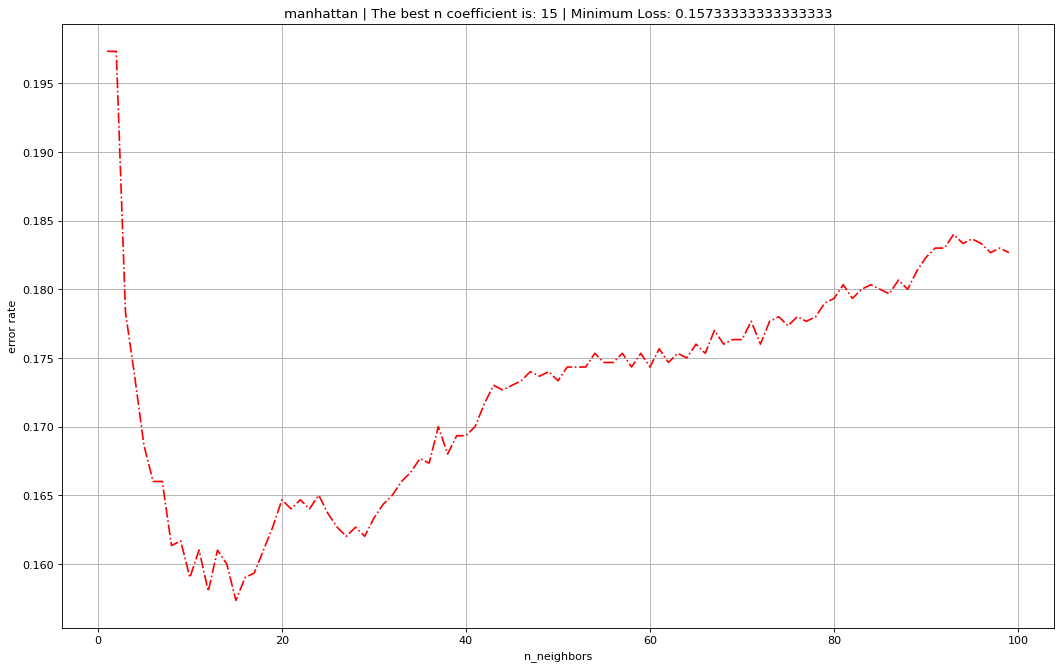

In [16]:
knn_optimization('manhattan')

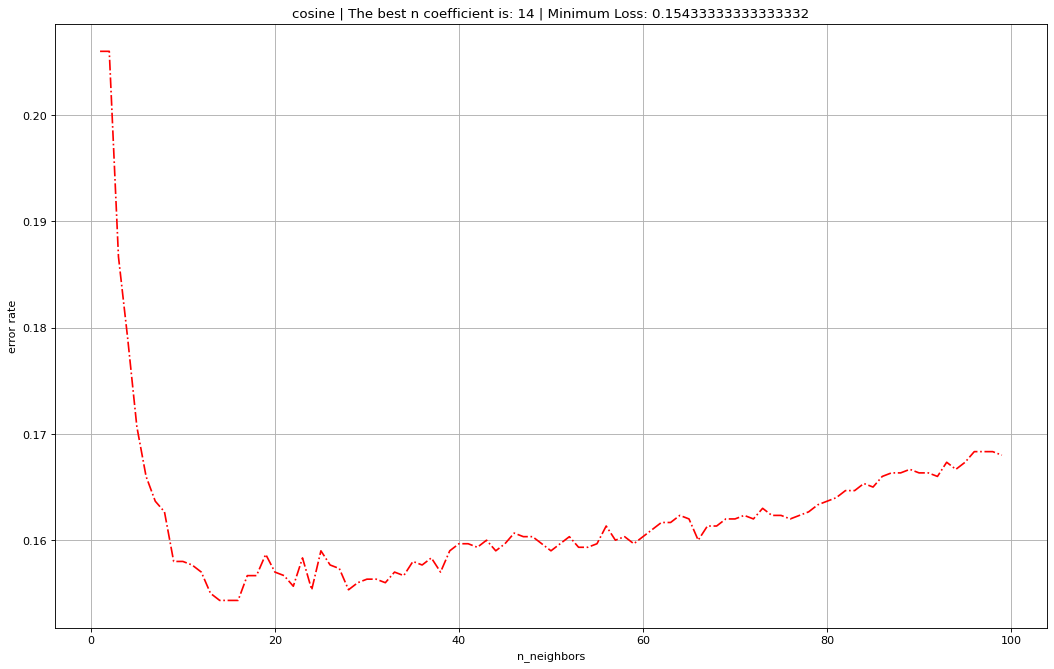

In [17]:
knn_optimization('cosine')

##### EXTRA 1.2 — SVC REGULARIZATION
In this section, we are going to determine the best regularization paramater value for each SVC kernel.

In [18]:
svc_optimization_results = {}

def svc_optimization(kernel,start,stop,step):
    test_accuracy_list, c_list = [], []

    for c in np.arange(start,stop,step):
        model0 = SVC(C=c, kernel=kernel)
        model0.fit(x_train,y_train) 
        y_pred = model0.predict(x_test)
        test_accuracy = accuracy_score(y_test,y_pred)

        test_accuracy_list.append(test_accuracy)
        c_list.append(c)

    svc_optimization_results[kernel] = [c_list[test_accuracy_list.index(max(test_accuracy_list))],max(test_accuracy_list)]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'{kernel} | The best regularization paramater is: {c_list[test_accuracy_list.index(max(test_accuracy_list))]} | Maximum Accuracy: {max(test_accuracy_list)}')
    plt.plot(c_list, test_accuracy_list, label='Test Accuracy',c = 'blue',linestyle='dashdot')
    plt.ylabel('accuracy rate')
    plt.xlabel("regularization parameter")

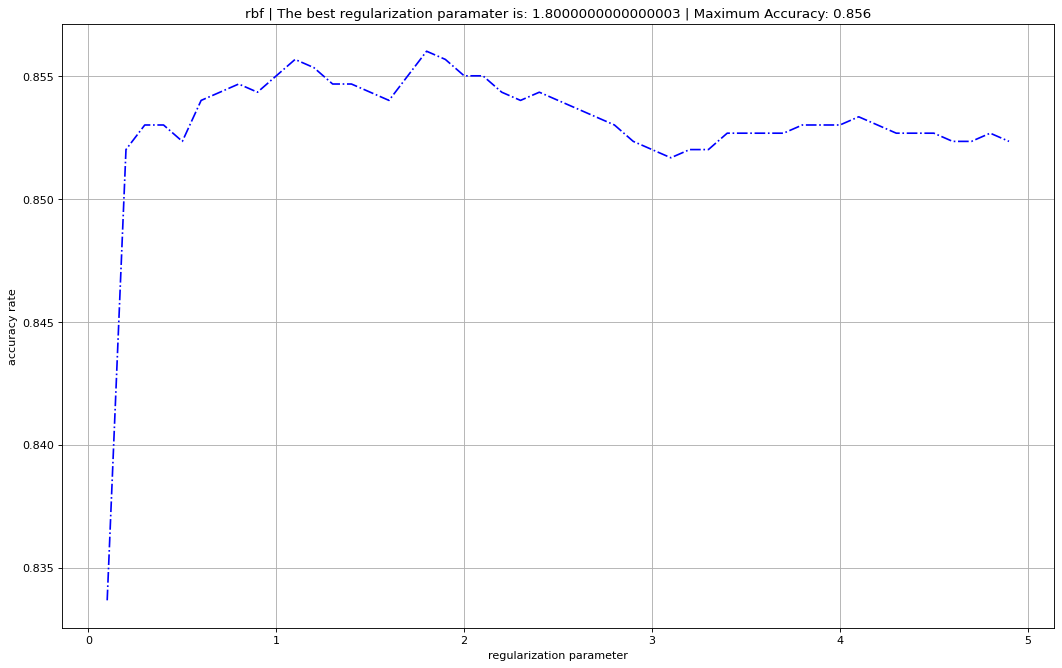

In [19]:
svc_optimization('rbf',0.1,5.0,0.1)

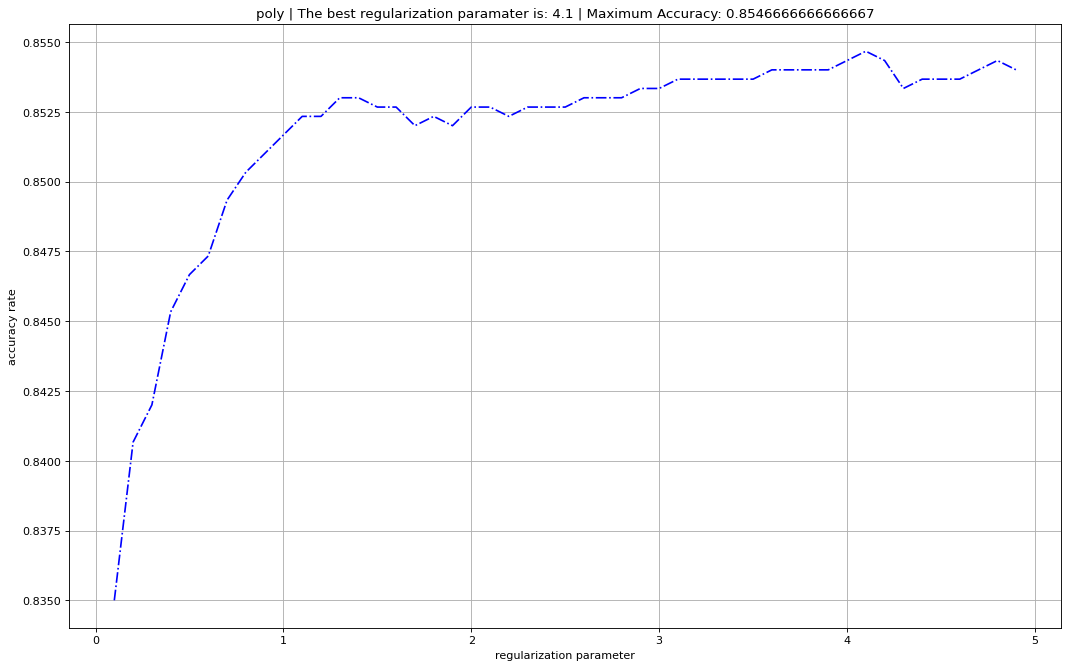

In [20]:
svc_optimization('poly',0.1,5.0,0.1)

#### EXTRA 2.0 — METRIC SELECTION FOR ALGORTIHMS BASED ON THE RESULTS WERE GIVEN AT PART EXTRA 1.0

In [21]:
# SVC Optimizing
SVC_RBF = SVC(kernel='rbf', C=svc_optimization_results['rbf'][0])
SVC_POLY = SVC(kernel='poly', C=svc_optimization_results['poly'][0])

# KNN Optimizing
KNN_MINKOWSKI = KNeighborsClassifier(n_neighbors=knn_optimization_results['minkowski'][0], metric='minkowski', weights='distance')
KNN_MANHATTAN = KNeighborsClassifier(n_neighbors=knn_optimization_results['manhattan'][0], metric='manhattan', weights='distance')
KNN_COSINE = KNeighborsClassifier(n_neighbors=knn_optimization_results['cosine'][0], metric='cosine', weights='distance')

#### 9.0 — MACHINE LEARNING
What we have used?
* Support Vector Machine Classifier
* KNN(K-Nearest Neighbors) Classifier

Definition of the accuracy metrics:
* Precision: It is a measure of the proportion of positive predictions that are actually correct. High precision means that the classifier has a low rate of false positive (negative instances classified as positive). This is important in problems where false positives are particularly costly, such as in spam filtering or credit scoring.

* Recall: It is a measure of the proportion of positive instances that are correctly identified by a classifier. High recall means that the classifier is able to correctly identify a large proportion of positive instances. This is important in problems where false negatives (positive instances that are classified as negative) are particularly harmful, such as in medical diagnosis or fraud detection.

* F1 Score: It is a measure of a model's precision and recall. It is the harmonic mean of precision and recall, and is often used as a single number summary of the performance of a classification model. The F1 score gives a balance between precision and recall and can be used to compare models, select hyperparameters, and evaluate performance in imbalanced classification problems.

* Cross Validation: It is a technique for evaluating the performance of a model by training it on multiple different subsets of the data and averaging the performance metrics. It helps to get an estimate of the model's performance on unseen data, and can help to identify overfitting and underfitting problems.

* Bias: It is an error value between average model prediction and ground truth. The bias of the estimated function tells us the capacity of the underlying model to
predict the values

* Variance: It is an average variability in the model prediction for the given dataset. The variance of the estimated function tells you how much the function can adjust
to the change in the dataset

Discussion on Metrics

* Overly-simplified Model, Under-fitting, High error on both test and train data... causes high bias. / Overly-complex Model, Over-fitting, Low error on train data and high on test, Starts modelling the noise in the input... causes high variance.

* Low Bias: Suggests less assumptions about the form of the target function. Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

* High-Bias: Suggests more assumptions about the form of the target function. Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

* Low Variance: Suggests small changes to the estimate of the target function with changes to the training dataset. Examples of low-variance machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

* High Variance: Suggests large changes to the estimate of the target function with changes to the training dataset. Examples of high-variance machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

In [22]:
def resume(model, title):
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)

    ACC = round(accuracy_score(y_test, y_predicted)*100,3)
    CM = confusion_matrix(y_test, y_predicted)

    TP = CM[0][0]
    TN = CM[1][1]
    FP = CM[0][1]
    FN = CM[1][0]
    TP_RATE = round(TP/(TP + FN)*100,3)
    FP_RATE = round(FP/(FP + TN)*100,3)
    PRECISION = round(TP/(TP + FN)*100,3)
    RECALL = round(TP/(TP + FP)*100,3)
    F1 = round(2*((PRECISION*RECALL)/(PRECISION+RECALL)),3)

    from mlxtend.evaluate import bias_variance_decomp
    loss, bias, var = bias_variance_decomp(model, x_train, y_train, x_test, y_test, loss='0-1_loss', num_rounds=200, random_seed=1)
    loss_value = 'Loss: %.3f' % loss
    bias_value = 'Bias: %.3f' % bias
    variance_value = 'Variance: %.3f' % var
    print(classification_report(y_test,y_predicted))

    from sklearn.model_selection import cross_val_score
    print(f'2-fold Cross Validation: %{round(cross_val_score(estimator = model, X = x_train, y = y_train, cv = 2).mean()*100,3)}')
    print(f'5-fold Cross Validation: %{round(cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5).mean()*100,3)}')
    print(f'10-fold Cross Validation: %{round(cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10).mean()*100,3)}')
    print(f'\n{title}\n{loss_value} | {bias_value} | {variance_value}\nTrue Positive Rate: %{TP_RATE} | False Positive Rate: %{FP_RATE}\nAccuracy: %{ACC} | Precision: %{RECALL} | Recall: %{PRECISION} | F1 Score: %{F1}\n')

    plt.figure(figsize=(16,10),dpi=80)
    CM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predicted))
    CM.plot()        
    plt.show()

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2387
           1       0.80      0.39      0.53       613

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000

2-fold Cross Validation: %85.443
5-fold Cross Validation: %85.471
10-fold Cross Validation: %85.643

Support Vector Machine / RBF
Loss: 0.149 | Bias: 0.147 | Variance: 0.021
True Positive Rate: %86.19 | False Positive Rate: %19.732
Accuracy: %85.6 | Precision: %97.528 | Recall: %86.19 | F1 Score: %91.509



<Figure size 1280x800 with 0 Axes>

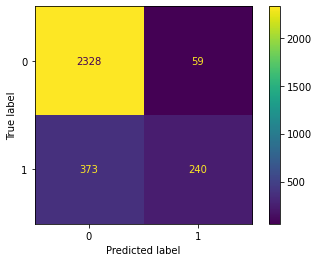

In [23]:
resume(SVC_RBF, 'Support Vector Machine / RBF')

              precision    recall  f1-score   support

           0       0.85      0.98      0.92      2387
           1       0.85      0.35      0.50       613

    accuracy                           0.85      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.85      0.85      0.83      3000

2-fold Cross Validation: %85.357
5-fold Cross Validation: %85.529
10-fold Cross Validation: %85.586

Support Vector Machine / POLY
Loss: 0.148 | Bias: 0.143 | Variance: 0.022
True Positive Rate: %85.486 | False Positive Rate: %14.741
Accuracy: %85.467 | Precision: %98.45 | Recall: %85.486 | F1 Score: %91.511



<Figure size 1280x800 with 0 Axes>

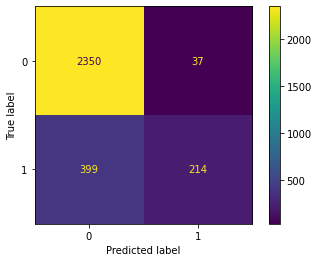

In [24]:
resume(SVC_POLY, 'Support Vector Machine / POLY')

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2387
           1       0.73      0.39      0.51       613

    accuracy                           0.85      3000
   macro avg       0.79      0.68      0.71      3000
weighted avg       0.83      0.85      0.83      3000

2-fold Cross Validation: %82.914
5-fold Cross Validation: %83.257
10-fold Cross Validation: %83.4

KNN(K-Nearest Neighbors) / MINKOWSKI
Loss: 0.179 | Bias: 0.160 | Variance: 0.068
True Positive Rate: %85.998 | False Positive Rate: %27.356
Accuracy: %84.533 | Precision: %96.23 | Recall: %85.998 | F1 Score: %90.827



<Figure size 1280x800 with 0 Axes>

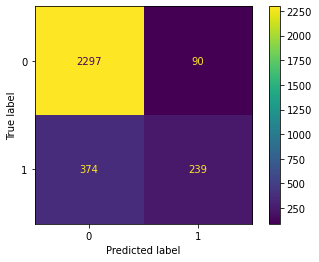

In [25]:
resume(KNN_MINKOWSKI, 'KNN(K-Nearest Neighbors) / MINKOWSKI')

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2387
           1       0.74      0.38      0.50       613

    accuracy                           0.85      3000
   macro avg       0.80      0.67      0.71      3000
weighted avg       0.83      0.85      0.83      3000

2-fold Cross Validation: %83.514
5-fold Cross Validation: %83.8
10-fold Cross Validation: %83.857

KNN(K-Nearest Neighbors) / COSINE
Loss: 0.170 | Bias: 0.155 | Variance: 0.055
True Positive Rate: %85.842 | False Positive Rate: %26.266
Accuracy: %84.567 | Precision: %96.523 | Recall: %85.842 | F1 Score: %90.87



<Figure size 1280x800 with 0 Axes>

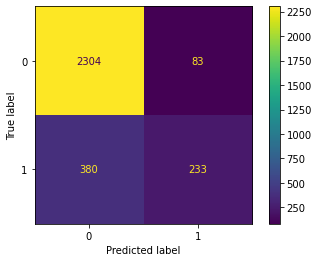

In [26]:
resume(KNN_COSINE, 'KNN(K-Nearest Neighbors) / COSINE')